In [1]:
import pandas as pd

In [19]:
train = pd.read_csv('../data/train.csv', header=None, names=["text"])
hidden = pd.read_csv('../data/hidden.csv', header=None, names=["text"])
answers = pd.read_csv('../data/answers.csv', header=None, names=["text"])

In [20]:
train.head()

,text
0,SR2SR2SGR
1,SRGSRSRSR
2,KFKFKFKFK
3,X2LS2FRS2
4,MMMMGGGGG


In [21]:
hidden.head()

,text
0,SR2SR22S?
1,61111111?
2,2222222M?
3,RSSGSRSR?
4,2221S1SK?


In [22]:
answers.head()

,text
0,SR2SR22SR
1,611111111
2,2222222M2
3,RSSGSRSRS
4,2221S1SKP


In [23]:
print(train.describe())
print(hidden.describe())
print(answers.describe())

             text
count        2543
unique       2543
top     SR2SR2SGR
freq            1
             text
count         379
unique        379
top     SR2SR22S?
freq            1
             text
count         379
unique        379
top     SR2SR22SR
freq            1


In [24]:
print(train.isnull().sum())
print(hidden.isnull().sum())
print(answers.isnull().sum())

text    0
dtype: int64
text    0
dtype: int64
text    0
dtype: int64


In [26]:
train['text_length'] = train['text'].apply(len)
hidden['text_length'] = hidden['text'].apply(len)
answers['text_length'] = answers['text'].apply(len)

In [34]:
print(train['text_length'].value_counts())
print(hidden['text_length'].value_counts())
print(answers['text_length'].value_counts())

text_length
9    2543
Name: count, dtype: int64
text_length
9    379
Name: count, dtype: int64
text_length
9    379
Name: count, dtype: int64


In [88]:
import re

# Vocab pattern
pattern = r"[ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567?]{9}"
train['pattern_match'] = train['text'].apply(lambda x: bool(re.search(pattern, x)))
hidden['pattern_match'] = hidden['text'].apply(lambda x: bool(re.search(pattern, x)))
answers['pattern_match'] = answers['text'].apply(lambda x: bool(re.search(pattern, x)))

print(train.value_counts(["pattern_match"]))
print(hidden.value_counts(["pattern_match"]))
print(answers.value_counts(["pattern_match"]))

pattern_match
True             2543
Name: count, dtype: int64
pattern_match
True             379
Name: count, dtype: int64
pattern_match
True             379
Name: count, dtype: int64


In [89]:
def character_frequency(df):
    all_chars = ''.join(df['text'])
    return pd.Series(list(all_chars)).value_counts()

train_char_freq = character_frequency(train)
hidden_char_freq = character_frequency(hidden)
answers_char_freq = character_frequency(answers)

freq_df = pd.concat([
    train_char_freq.to_frame().reset_index().rename(columns={"index": "train_char", "count": "train_char_freq"}),
    hidden_char_freq.to_frame().reset_index().rename(columns={"index": "hidden_char", "count": "hidden_char_freq"}),
    answers_char_freq.to_frame().reset_index().rename(columns={"index": "answers_char", "count": "answers_char_freq"}),
], axis=1)
freq_df

,train_char,train_char_freq,hidden_char,hidden_char_freq,answers_char,answers_char_freq
0,S,5191,S,702.0,S,726.0
1,2,3892,2,607.0,2,646.0
2,M,2281,?,379.0,M,334.0
3,R,2071,M,306.0,R,303.0
4,G,1736,G,235.0,G,262.0
5,1,1499,R,211.0,1,193.0
6,K,1260,1,176.0,K,176.0
7,Z,923,K,164.0,E,144.0
8,E,867,E,141.0,P,111.0
9,T,642,Z,98.0,Z,98.0


In [90]:
per_sample_freq_df = pd.concat([
    freq_df[["train_char"]],
    freq_df["train_char_freq"].apply(lambda x: int(x) / len(train) if not pd.isna(x) else 0).rename("train_per_line_freq"),
    freq_df[["hidden_char"]],
    freq_df["hidden_char_freq"].apply(lambda x: int(x) / len(hidden) if not pd.isna(x) else 0).rename("hidden_per_line_freq"),
    freq_df[["answers_char"]],
    freq_df["answers_char_freq"].apply(lambda x: int(x) / len(answers) if not pd.isna(x) else 0).rename("answers_per_line_freq"),
], axis=1)

per_sample_freq_df

,train_char,train_per_line_freq,hidden_char,hidden_per_line_freq,answers_char,answers_per_line_freq
0,S,2.041290,S,1.852243,S,1.915567
1,2,1.530476,2,1.601583,2,1.704485
2,M,0.896972,?,1.000000,M,0.881266
3,R,0.814392,M,0.807388,R,0.799472
4,G,0.682658,G,0.620053,G,0.691293
5,1,0.589461,R,0.556728,1,0.509235
6,K,0.495478,1,0.464380,K,0.464380
7,Z,0.362957,K,0.432718,E,0.379947
8,E,0.340936,E,0.372032,P,0.292876
9,T,0.252458,Z,0.258575,Z,0.258575


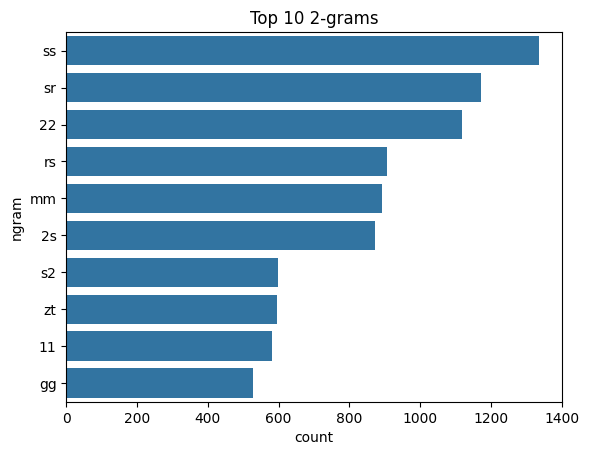

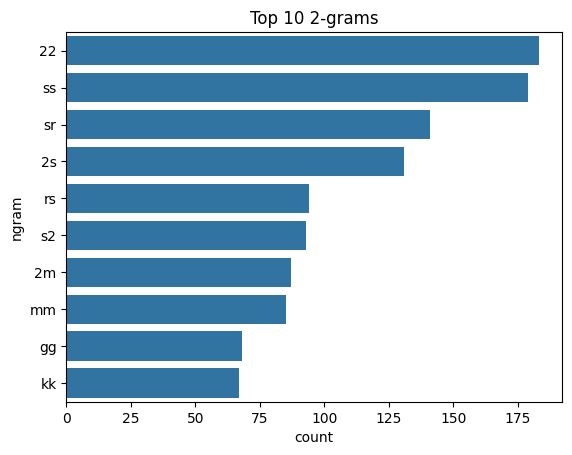

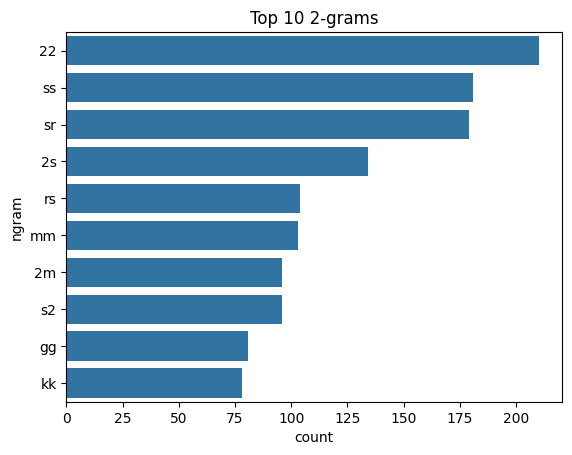

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(df, n=2, top_n=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), analyzer='char')
    ngrams = vectorizer.fit_transform(df['text'])
    sum_ngrams = ngrams.sum(axis=0)
    ngram_freq = [(word, sum_ngrams[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:top_n]
    df_ngram = pd.DataFrame(ngram_freq, columns=['ngram', 'count'])
    sns.barplot(x='count', y='ngram', data=df_ngram)
    plt.title(f'Top {top_n} {n}-grams')
    plt.show()

plot_top_ngrams(train, n=2)
plot_top_ngrams(hidden, n=2)
plot_top_ngrams(answers, n=2)


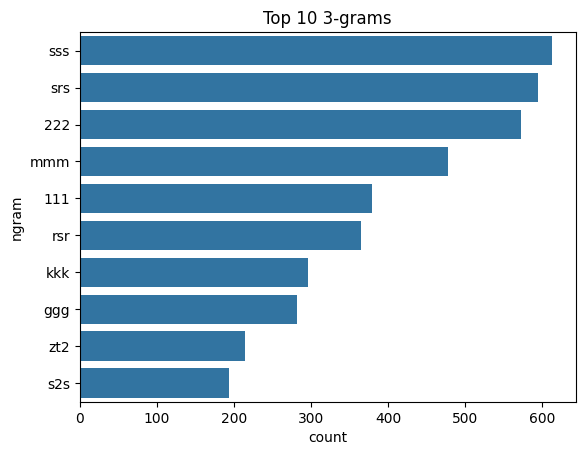

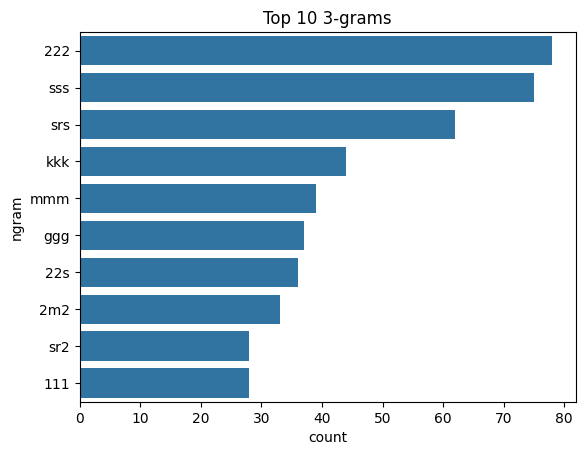

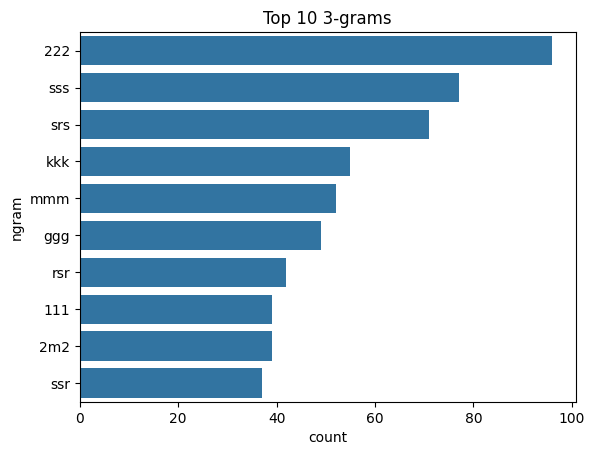

In [96]:
plot_top_ngrams(train, n=3)
plot_top_ngrams(hidden, n=3)
plot_top_ngrams(answers, n=3)
